In [267]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
# Open the trips.csv file
trips = pd.read_csv("../data/trips.csv", index_col=0)

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual


In [233]:
trips.columns

Index(['duration', 'start_date', 'end_date', 'start_station_number',
       'start_station', 'end_station_number', 'end_station', 'bike_number',
       'member_type', 'start_day', 'start_hour', 'start_weekday'],
      dtype='object')

# Change types to datetime

In [13]:
#Check the types of the trips file
trips.dtypes

duration                 int64
start_date              object
end_date                object
start_station_number     int64
start_station           object
end_station_number       int64
end_station             object
bike_number             object
member_type             object
dtype: object

The start_date and end_date need to be changed to a datetime type

In [14]:
# Change type to datetime
trips = trips.astype({"start_date": "datetime64"})
trips = trips.astype({"end_date": "datetime64"})

In [15]:
# Check the types of the trips file
trips.dtypes

duration                         int64
start_date              datetime64[ns]
end_date                datetime64[ns]
start_station_number             int64
start_station                   object
end_station_number               int64
end_station                     object
bike_number                     object
member_type                     object
dtype: object

# Analysis of the distribution of trips performed by day

From the start_date we extract the day of the week and the hours of the day in new columns

In [16]:
# Create new columns with the day of the week and the hour of the day using start_date.
trips["start_day"] = trips["start_date"].dt.weekday_name

In [17]:
trips["start_hour"] = trips["start_date"].dt.hour

In [18]:
# Check the head of trips
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,start_day,start_hour
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,Sunday,0
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,Sunday,0
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,Sunday,0
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,Sunday,0
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,Sunday,0


Let´s plot the start_hour for every day of the week. The first step is to calculate the mean of trips started by day and by hour.

In [35]:
# Group by start_hour and start_day and count the number of trips
trips_day_count = trips.groupby(["start_hour","start_day"]).count()

In [37]:
# Check trips_day head
trips_day_count.head()

duration  start_date  end_date  start_station_number  \
start_hour start_day                                                         
0          Friday         7925        7925      7925                  7925   
           Monday         5284        5284      5284                  5284   
           Saturday      13396       13396     13396                 13396   
           Sunday        14708       14708     14708                 14708   
           Thursday       5479        5479      5479                  5479   

                      start_station  end_station_number  end_station  \
start_hour start_day                                                   
0          Friday              7925                7925         7925   
           Monday              5284                5284         5284   
           Saturday           13396               13396        13396   
           Sunday             14708               14708        14708   
           Thursday            5479                5479         5479   

                      bike_number  member_type  
start_hour start_day                            
0          Friday            7925         7925  
           Monday            5284         5284  
           Saturday         13396        13396  
           Sunday           14708        14708  
           Thursday          5479         5479

In [38]:
# Use unstack() in order to be able to plot the total number of trips by hour as a function of the day for two years
trips_day_count = trips_day_count['duration'].unstack()

In [43]:
# Divide the total amount of trips by 108 to obtain the average of trips per week
trips_day_count = trips_day_count/108

In [44]:
# Check trip_day_count
trips_day_count

start_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
start_hour,,,,,,,
0,73.379630,48.925926,124.037037,136.185185,50.731481,43.925926,47.555556
1,37.861111,24.425926,84.416667,99.000000,21.453704,17.694444,19.425926
2,20.509259,13.370370,57.722222,67.361111,11.166667,9.898148,11.046296
3,8.250000,7.361111,27.972222,36.027778,6.481481,5.657407,6.037037
4,14.342593,13.564815,13.314815,14.157407,13.805556,14.185185,13.509259
5,73.638889,71.212963,20.314815,17.564815,80.268519,85.833333,94.250000
6,241.037037,239.157407,50.046296,45.759259,287.814815,307.685185,312.916667
7,587.879630,571.231481,127.592593,94.796296,717.101852,747.083333,767.574074
8,972.518519,853.574074,269.388889,212.037037,1061.740741,1073.231481,1107.953704


Text(0, 0.5, 'Trips number')

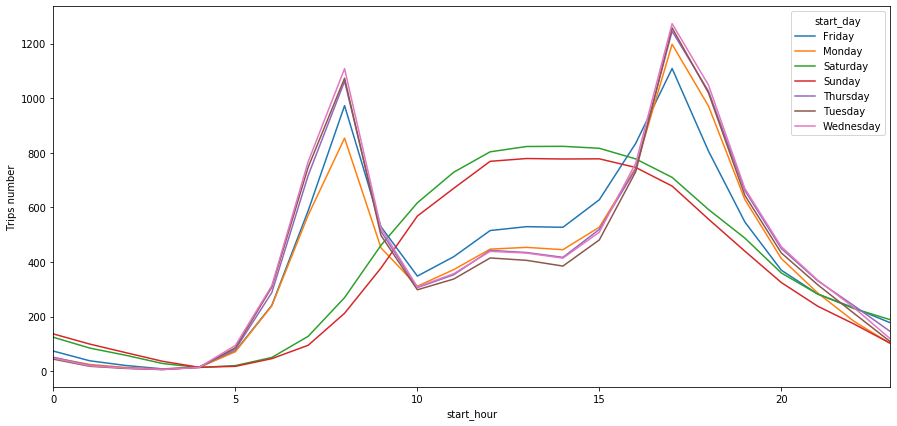

In [46]:
# plot the data to see the number of trips per hour as a function of the days
fig, ax = plt.subplots(figsize=(15,7))
trips_day_count.plot(ax=ax)
plt.ylabel('Trips number')

There are two types of curves one for the use during the weekdays (from Monday to Friday) and another one for the weekends

# Cluster stations as a function of bike usage behaviour

Each station could have their own profile of usage depending if it is a station situated in a predominantly living area or in a predominantly working area. 

In an area where people predominantly live there is a pike of bikes living the stations in the morning when people go to work between 7 and 9 am whereas in an area where people work there should be a peak of people going back home and taking bikes in the evening between 5 and 7 pm.
Other stations might have a mixed profile if they are located in areas that are a mix of working and living areas.

Let's try to cluster the bike stations as a function of these characteristics.
In order to do so one needs to group the data by start_hour and station_number and separate the days between weekdays and weekends

In [54]:
# Add a column named start_weekday to the trips dataframe that says if the start_day is a weekday or a weekend.
weekday_lst = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
trips['start_weekday'] = ['weekday' if x in weekday_lst else 'weekend' for x in trips['start_day']]

In [55]:
# Check trips head
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,start_day,start_hour,start_weekday
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,Sunday,0,weekend
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,Sunday,0,weekend
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,Sunday,0,weekend
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,Sunday,0,weekend
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,Sunday,0,weekend


The clustering will be done using the bike usage during the weekdays only

In [56]:
# Create trips_weekday dataframe with only the weekdays by removing all weekend days
trips_weekday = trips[~trips.start_weekday.str.contains("weekend")]

In [57]:
# Check trips_weekday head
trips_weekday.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,start_day,start_hour,start_weekday
4063,5505,2017-01-02 00:00:04,2017-01-02 01:31:49,31209,1st & N St SE,31209,1st & N St SE,W22443,Casual,Monday,0,weekday
4064,364,2017-01-02 00:00:35,2017-01-02 00:06:39,31102,11th & Kenyon St NW,31400,Georgia & New Hampshire Ave NW,W22033,Casual,Monday,0,weekday
4065,492,2017-01-02 00:01:09,2017-01-02 00:09:21,31103,16th & Harvard St NW,31110,20th St & Florida Ave NW,W01364,Member,Monday,0,weekday
4066,5314,2017-01-02 00:03:08,2017-01-02 01:31:43,31209,1st & N St SE,31209,1st & N St SE,W20940,Casual,Monday,0,weekday
4067,363,2017-01-02 00:03:23,2017-01-02 00:09:27,31103,16th & Harvard St NW,31110,20th St & Florida Ave NW,W20701,Casual,Monday,0,weekday


The data is grouped by start_hour and by start_station_number so we can see the bike usage per hour and per started bike station. 

In [243]:
# Group by start_hour and start_station_number and count the number of trips
trips_station = trips_weekday.groupby(["start_hour","start_station_number"]).count()

In [244]:
# Use unstack() in order to be able to plot the total number of trips by hour as a function of the day for two years
trips_station = trips_station['duration'].unstack()

In [245]:
trips_station

start_station_number,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,...,32228,32229,32400,32401,32402,32403,32404,32405,32406,32407
start_hour,,,,,,,,,,,,,,,,,,,,,
0,18.0,25.0,34.0,20.0,5.0,30.0,49.0,27.0,18.0,17.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,4.0,1.0
1,10.0,11.0,24.0,8.0,NaN,6.0,19.0,5.0,3.0,6.0,...,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,8.0,18.0,4.0,2.0,2.0,6.0,12.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,1.0,34.0,6.0,1.0,NaN,8.0,1.0,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,1.0,61.0,3.0,1.0,5.0,84.0,6.0,3.0,3.0,3.0,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,22.0,45.0,24.0,21.0,5.0,44.0,22.0,18.0,164.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,78.0,72.0,255.0,225.0,501.0,82.0,96.0,392.0,662.0,53.0,...,NaN,NaN,1.0,2.0,NaN,8.0,1.0,NaN,1.0,NaN
7,192.0,234.0,789.0,285.0,859.0,323.0,371.0,1262.0,914.0,335.0,...,NaN,20.0,1.0,NaN,2.0,19.0,7.0,2.0,4.0,NaN
8,461.0,529.0,1156.0,367.0,617.0,937.0,563.0,2274.0,961.0,426.0,...,NaN,41.0,NaN,6.0,8.0,8.0,5.0,NaN,5.0,NaN


Some values for some stations are NaN´s. This means that for some stations there are no values at some specific hours. Let´s check the extent of the problem.

In [246]:
# Evaluate the number of NaN's
trips_station.isna().sum()

start_station_number
31000     0
31001     0
31002     0
31003     0
31004     2
31005     0
31006     0
31007     0
31008     1
31009     1
31010     0
31011     0
31012     1
31013     0
31014     0
31015     1
31016     0
31017     0
31018     0
31019     0
31020     0
31021     0
31022     0
31023     0
31024     0
31025     0
31026     0
31027     1
31028     2
31029     1
         ..
32207     4
32208     7
32209     5
32210     8
32211    10
32212     6
32213     2
32214     4
32215     2
32216     5
32217     8
32218     3
32219     5
32220     1
32221     6
32222     8
32223     6
32224     5
32225     6
32227     7
32228    18
32229     9
32400     9
32401     6
32402     9
32403     2
32404     6
32405    11
32406     8
32407    17
Length: 529, dtype: int64

Looking at the pattern of presence of NaN's we can assume that it corresponds to some hours when ther is no use of bikes. Let's find out which stations have more than 2 NaN's. 

In [247]:
# Remove all stations that have more than two NaN's
trips_station = trips_station.dropna(thresh=len(trips_station) - 2, axis=1)

When looking at the patterns of the NaN's and looking at the values around the NaN's it makes sense to state that the lack of value during a specific hour correspond to 0. Therefore the decision is made to replace the NaN's by 0

In [248]:
# Replace the NaN's by 0
trips_station = trips_station.fillna(0)

In [249]:
trips_station

start_station_number,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,...,32056,32062,32066,32075,32083,32203,32213,32215,32220,32403
start_hour,,,,,,,,,,,,,,,,,,,,,
0,18.0,25.0,34.0,20.0,5.0,30.0,49.0,27.0,18.0,17.0,...,2.0,5.0,3.0,0.0,3.0,15.0,11.0,11.0,4.0,0.0
1,10.0,11.0,24.0,8.0,0.0,6.0,19.0,5.0,3.0,6.0,...,7.0,1.0,3.0,1.0,6.0,2.0,1.0,2.0,0.0,1.0
2,8.0,18.0,4.0,2.0,2.0,6.0,12.0,5.0,2.0,3.0,...,0.0,7.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0
3,1.0,34.0,6.0,1.0,0.0,8.0,1.0,5.0,0.0,0.0,...,1.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0
4,1.0,61.0,3.0,1.0,5.0,84.0,6.0,3.0,3.0,3.0,...,3.0,7.0,9.0,0.0,0.0,0.0,273.0,0.0,41.0,1.0
5,22.0,45.0,24.0,21.0,5.0,44.0,22.0,18.0,164.0,25.0,...,48.0,4.0,8.0,1.0,0.0,0.0,3.0,6.0,132.0,0.0
6,78.0,72.0,255.0,225.0,501.0,82.0,96.0,392.0,662.0,53.0,...,44.0,6.0,2.0,5.0,6.0,1.0,7.0,248.0,11.0,8.0
7,192.0,234.0,789.0,285.0,859.0,323.0,371.0,1262.0,914.0,335.0,...,146.0,5.0,22.0,108.0,6.0,20.0,5.0,356.0,28.0,19.0
8,461.0,529.0,1156.0,367.0,617.0,937.0,563.0,2274.0,961.0,426.0,...,187.0,12.0,19.0,537.0,11.0,29.0,33.0,1161.0,188.0,8.0


Before we can plot the graphs for the selected stations we need to reset the index in order to bring the columns down at the same level as the index.

Plot the dataseries of bike usage for two specific station numbers (31245 and 31018)

In [250]:
# Select the data for stations number 31245 and 31018
trips_station_comparison = trips_station[[31245, 31018]]

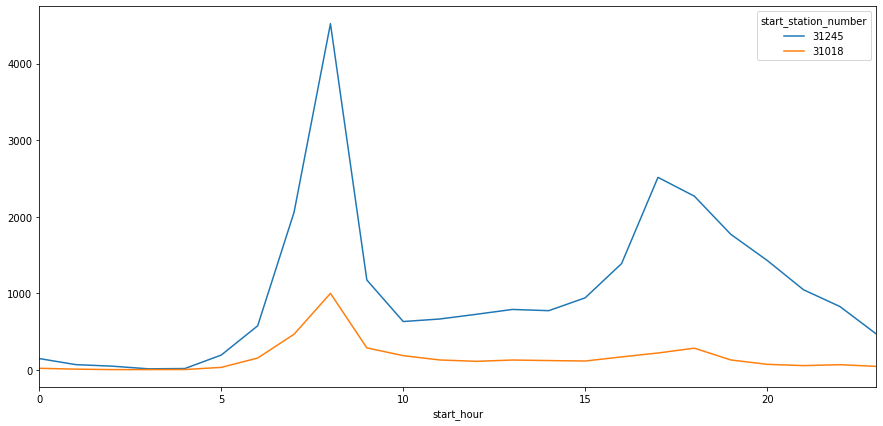

In [253]:
# Print the graphs for the two stations
fig, ax = plt.subplots(figsize=(15,7))
trips_station_comparison.plot(ax=ax)

There is a massive difference between these two stations. The station number 31245 is much more used than the station number 31018. Before performing a clustering in order to separate the stations as a function of the user behaviour they need to be normalized in order to make the clustering easier.

In [261]:
# Normalize the time series for all stations using the apply method.
trips_station_normal = trips_station.apply(lambda x: (x-min(x))/(max(x)-min(x)), axis=0)

In [262]:
trips_station_normal

start_station_number,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,...,32056,32062,32066,32075,32083,32203,32213,32215,32220,32403
start_hour,,,,,,,,,,,,,,,,,,,,,
0,0.036957,0.027027,0.018995,0.018646,0.005821,0.011828,0.085409,0.009284,0.018730,0.009913,...,0.010695,0.013937,0.095238,0.000000,0.06,0.365854,0.038194,0.009475,0.021277,0.000000
1,0.019565,0.000000,0.012868,0.006869,0.000000,0.000000,0.032028,0.000774,0.003122,0.003499,...,0.037433,0.000000,0.095238,0.001862,0.12,0.048780,0.003472,0.001723,0.000000,0.052632
2,0.015217,0.013514,0.000613,0.000981,0.002328,0.000000,0.019573,0.000774,0.002081,0.001749,...,0.000000,0.020906,0.047619,0.001862,0.02,0.073171,0.000000,0.000861,0.005319,0.052632
3,0.000000,0.044402,0.001838,0.000000,0.000000,0.000986,0.000000,0.000774,0.000000,0.000000,...,0.005348,0.010453,0.095238,0.001862,0.02,0.024390,0.000000,0.000000,0.010638,0.052632
4,0.000000,0.096525,0.000000,0.000000,0.005821,0.038443,0.008897,0.000000,0.003122,0.001749,...,0.016043,0.020906,0.380952,0.000000,0.00,0.000000,0.947917,0.000000,0.218085,0.052632
5,0.045652,0.065637,0.012868,0.019627,0.005821,0.018728,0.037367,0.005803,0.170656,0.014577,...,0.256684,0.010453,0.333333,0.001862,0.00,0.000000,0.010417,0.005168,0.702128,0.000000
6,0.167391,0.117761,0.154412,0.219823,0.583236,0.037457,0.169039,0.150484,0.688866,0.030904,...,0.235294,0.017422,0.047619,0.009311,0.12,0.024390,0.024306,0.213609,0.058511,0.421053
7,0.415217,0.430502,0.481618,0.278705,1.000000,0.156235,0.658363,0.487041,0.951093,0.195335,...,0.780749,0.013937,1.000000,0.201117,0.12,0.487805,0.017361,0.306632,0.148936,1.000000
8,1.000000,1.000000,0.706495,0.359176,0.718277,0.458847,1.000000,0.878530,1.000000,0.248397,...,1.000000,0.038328,0.857143,1.000000,0.22,0.707317,0.114583,1.000000,1.000000,0.421053


After the normalisation a k-mean clustering (as a first trial) is applied to try to cluster the bike stations as a function of their use. 

As mentionned earlier the expected behaviour of the stations (especially on weekdays) would make them fall in three categories:
1. Stations located in a predominantly living area
2. Stations located in a predominantly working area
3. Stations situated in a mixed area, living and working area

For this reason the number of clusters will be 3.

In [277]:
# Transpose the dataframe in order to be able to apply the k-means model on each bike station.
trips_station_normal_trans = trips_station_normal.transpose()

In [279]:
# Transform the trips_station_normal_trans dataframe to an array in order to be able to use k-means method
X = trips_station_normal_trans.to_numpy()

In [281]:
# Fit the kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [287]:
# See the label array and assign it to a variable called label
kmeans.labels_

array([1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1,

In [293]:
# Add the label array to the trips_station_normal_trans array
array_cluster = np.column_stack((trips_station_normal_trans,kmeans.labels_))

In [294]:
# Transform the array into a dataframe
trips_station_normal_trans = pd.DataFrame(array_cluster)

In [295]:
# Transpose the dataframe to have the cluster number for each station in the dataframe
trips_station_normal_cluster = trips_station_normal_trans.transpose()

In [297]:
trips_station_normal_cluster

,0,1,2,3,4,5,6,7,8,9,...,388,389,390,391,392,393,394,395,396,397
0,0.036957,0.027027,0.018995,0.018646,0.005821,0.011828,0.085409,0.009284,0.018730,0.009913,...,0.010695,0.013937,0.095238,0.000000,0.06,0.365854,0.038194,0.009475,0.021277,0.000000
1,0.019565,0.000000,0.012868,0.006869,0.000000,0.000000,0.032028,0.000774,0.003122,0.003499,...,0.037433,0.000000,0.095238,0.001862,0.12,0.048780,0.003472,0.001723,0.000000,0.052632
2,0.015217,0.013514,0.000613,0.000981,0.002328,0.000000,0.019573,0.000774,0.002081,0.001749,...,0.000000,0.020906,0.047619,0.001862,0.02,0.073171,0.000000,0.000861,0.005319,0.052632
3,0.000000,0.044402,0.001838,0.000000,0.000000,0.000986,0.000000,0.000774,0.000000,0.000000,...,0.005348,0.010453,0.095238,0.001862,0.02,0.024390,0.000000,0.000000,0.010638,0.052632
4,0.000000,0.096525,0.000000,0.000000,0.005821,0.038443,0.008897,0.000000,0.003122,0.001749,...,0.016043,0.020906,0.380952,0.000000,0.00,0.000000,0.947917,0.000000,0.218085,0.052632
5,0.045652,0.065637,0.012868,0.019627,0.005821,0.018728,0.037367,0.005803,0.170656,0.014577,...,0.256684,0.010453,0.333333,0.001862,0.00,0.000000,0.010417,0.005168,0.702128,0.000000
6,0.167391,0.117761,0.154412,0.219823,0.583236,0.037457,0.169039,0.150484,0.688866,0.030904,...,0.235294,0.017422,0.047619,0.009311,0.12,0.024390,0.024306,0.213609,0.058511,0.421053
7,0.415217,0.430502,0.481618,0.278705,1.000000,0.156235,0.658363,0.487041,0.951093,0.195335,...,0.780749,0.013937,1.000000,0.201117,0.12,0.487805,0.017361,0.306632,0.148936,1.000000
8,1.000000,1.000000,0.706495,0.359176,0.718277,0.458847,1.000000,0.878530,1.000000,0.248397,...,1.000000,0.038328,0.857143,1.000000,0.22,0.707317,0.114583,1.000000,1.000000,0.421053
9,0.886957,0.370656,0.272672,0.414132,0.445867,0.460818,0.645907,0.474275,0.421436,0.163848,...,0.352941,0.024390,0.142857,0.238361,0.20,0.902439,0.062500,0.679587,0.510638,0.210526


In [306]:
# Select the stations that are part of cluster 0 (i.e. that have index 24 = 0)
trips_station_normal_cluster0 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==0.000000]]

In [307]:
# Check if it worked
trips_station_normal_cluster0

,4,13,18,29,30,31,32,34,35,48,...,372,373,374,378,382,383,388,391,395,396
0,0.005821,0.043771,0.017068,0.003692,0.023715,0.014938,0.006012,0.018248,0.002736,0.008234,...,0.010499,0.003328,0.014085,0.016667,0.045752,0.012346,0.010695,0.000000,0.009475,0.021277
1,0.000000,0.013468,0.006024,0.001846,0.002635,0.004149,0.004008,0.002433,0.000000,0.000000,...,0.013123,0.000000,0.002347,0.016667,0.006536,0.000000,0.037433,0.001862,0.001723,0.000000
2,0.002328,0.005051,0.000000,0.001231,0.001318,0.001660,0.002004,0.002433,0.002736,0.002745,...,0.000000,0.000832,0.000000,0.000000,0.006536,0.001543,0.000000,0.001862,0.000861,0.005319
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002625,0.000832,0.000000,0.033333,0.006536,0.000000,0.005348,0.001862,0.000000,0.010638
4,0.005821,0.020202,0.001004,0.001231,0.004611,0.002490,0.002004,0.015815,0.002736,0.006404,...,0.000000,0.014975,0.007042,0.000000,0.000000,0.001543,0.016043,0.000000,0.000000,0.218085
5,0.005821,0.313131,0.029116,0.020923,0.088933,0.078008,0.012024,0.120438,0.015048,0.043001,...,0.009186,0.316140,0.173709,0.005556,0.013072,0.001543,0.256684,0.001862,0.005168,0.702128
6,0.583236,0.190236,0.151606,0.076308,0.374835,0.214938,0.254509,0.369830,0.274966,0.256176,...,0.043307,0.389351,0.706573,0.172222,0.052288,0.137346,0.235294,0.009311,0.213609,0.058511
7,1.000000,0.254209,0.463855,0.472615,0.892622,0.400830,1.000000,1.000000,0.726402,0.493138,...,0.194226,0.698835,1.000000,0.866667,0.307190,0.328704,0.780749,0.201117,0.306632,0.148936
8,0.718277,1.000000,1.000000,1.000000,1.000000,1.000000,0.961924,0.756691,1.000000,1.000000,...,1.000000,1.000000,0.488263,0.827778,0.516340,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.445867,0.373737,0.285141,0.449846,0.557312,0.342739,0.240481,0.352798,0.458276,0.179323,...,0.175853,0.233777,0.551643,0.238889,0.222222,0.500000,0.352941,0.238361,0.679587,0.510638


In [310]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster0 = trips_station_normal_cluster0.drop([24])

In [311]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster0['average'] = trips_station_normal_cluster0.mean(numeric_only=True, axis=1)

In [312]:
trips_station_normal_cluster0.head()

,4,13,18,29,30,31,32,34,35,48,...,373,374,378,382,383,388,391,395,396,average
0,0.005821,0.043771,0.017068,0.003692,0.023715,0.014938,0.006012,0.018248,0.002736,0.008234,...,0.003328,0.014085,0.016667,0.045752,0.012346,0.010695,0.000000,0.009475,0.021277,0.018284
1,0.000000,0.013468,0.006024,0.001846,0.002635,0.004149,0.004008,0.002433,0.000000,0.000000,...,0.000000,0.002347,0.016667,0.006536,0.000000,0.037433,0.001862,0.001723,0.000000,0.009244
2,0.002328,0.005051,0.000000,0.001231,0.001318,0.001660,0.002004,0.002433,0.002736,0.002745,...,0.000832,0.000000,0.000000,0.006536,0.001543,0.000000,0.001862,0.000861,0.005319,0.005624
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000832,0.000000,0.033333,0.006536,0.000000,0.005348,0.001862,0.000000,0.010638,0.005092
4,0.005821,0.020202,0.001004,0.001231,0.004611,0.002490,0.002004,0.015815,0.002736,0.006404,...,0.014975,0.007042,0.000000,0.000000,0.001543,0.016043,0.000000,0.000000,0.218085,0.016793


Text(0.5, 0, 'Hour')

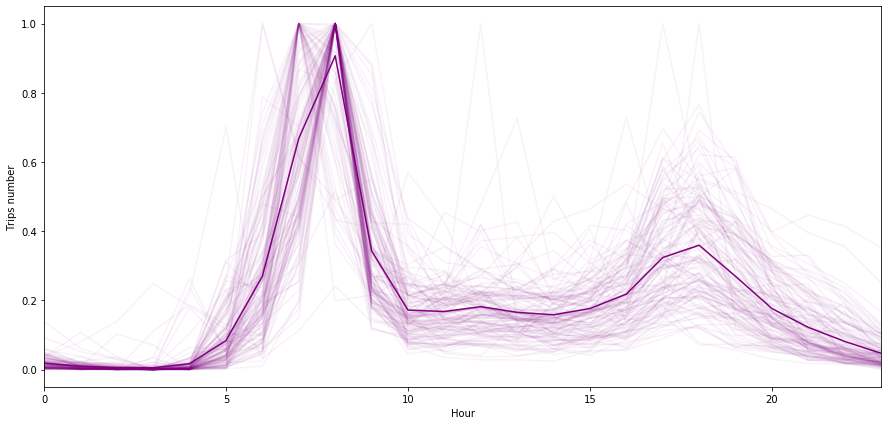

In [331]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster0.plot(ax=ax,color='purple', alpha=0.05)
trips_station_normal_cluster0["average"].plot(ax=ax,color='purple', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

The bike stations of cluster 0 are stations situated in living areas of Washington DC, where the bikes are mostly taken around 7 8 am in order to go to work during weekdays.

In [319]:
# Select the stations that are part of cluster 1 (i.e. that have index 24 = 1)
trips_station_normal_cluster1 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==1.000000]]

In [321]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster1 = trips_station_normal_cluster1.drop([24])

In [322]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster1['average'] = trips_station_normal_cluster1.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

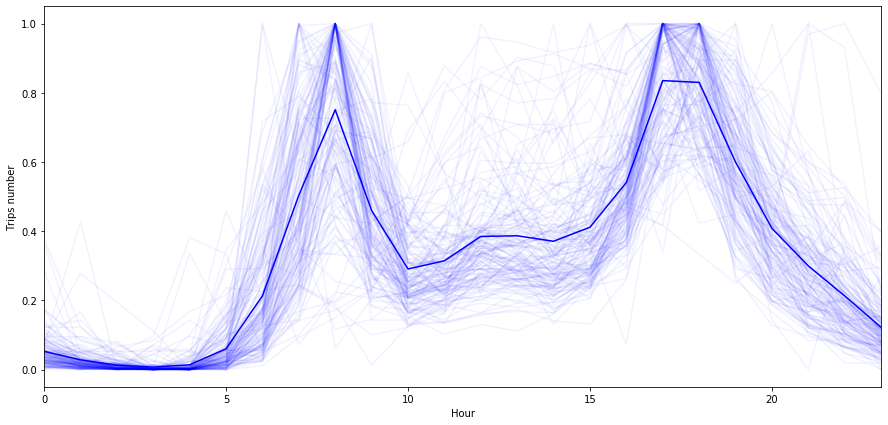

In [332]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster1.plot(ax=ax,color='blue', alpha=0.05)
trips_station_normal_cluster1["average"].plot(ax=ax,color='blue', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [324]:
# Select the stations that are part of cluster 2 (i.e. that have index 24 = 2)
trips_station_normal_cluster2 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==2.000000]]

In [325]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster2 = trips_station_normal_cluster2.drop([24])

In [326]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster2['average'] = trips_station_normal_cluster2.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

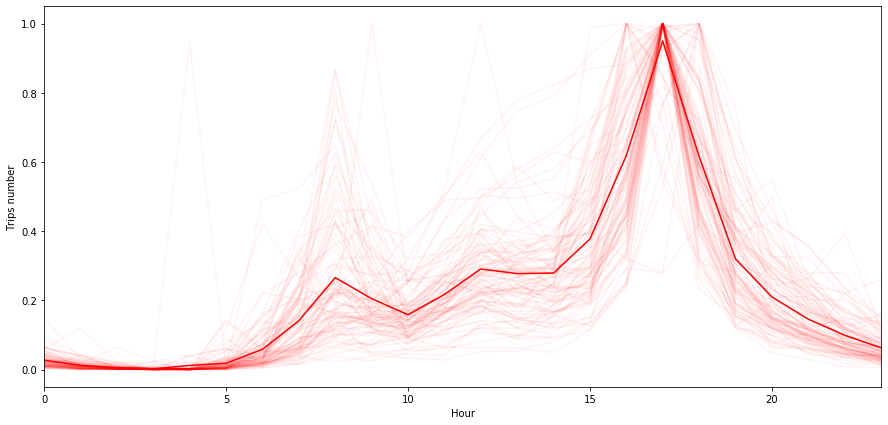

In [333]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster2.plot(ax=ax,color='red', alpha=0.05)
trips_station_normal_cluster2["average"].plot(ax=ax,color='red', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

The bike stations grouped under cluster number 0 show one clear peak in the morning around 8 am so they are bike stations located in living areas of Washington.

The stations under cluster number 1 show 2 peaks, one in the morning and the other one in the evening so it accounts for stations situated in areas where there is a mix of living areas and offices or working areas.

Finally the stations under cluster number 3 only present a peak in the evening around 5 pm and correspond to stations located in areas where people work.